In [17]:
import numpy as np
import nibabel as nib
from scipy.io import loadmat
path_response = '../../../T5 EVO/alignment_olfaction_datasets/curated_datasets/dfs_result_fmri/'

from nilearn import plotting




In [2]:
# path_ROI = '../../../T5 EVO/fmri/supportings/s01/'
# maskfile =  'rwAmygdala.nii'; 
# response_filename = 'df_fmri_sagar_metrics_Amygdala_S1_molformer.mat'
# mat_data = loadmat(path_response + response_filename)
# 
# data_key = 'corr_coef'  # Change this to your actual variable name
# data_array = mat_data[data_key]

In [19]:
def mat2nii(path_response, roi, s):
    
    path_ROI = f'../../../T5 EVO/fmri/supportings/{s}/'
    response_filename = f'df_fmri_sagar_metrics_{roi}_{s}_molformer.mat'
    maskfile =  f'rw{roi}.nii'
    mat_data = loadmat(path_response + response_filename)
    data_key = 'corr_coef'
    data_array = mat_data[data_key]
    
    
    
    # Load the NIfTI mask file
    mask_img = nib.load(path_ROI + maskfile)
    mask_data = mask_img.get_fdata()
    mask_data[np.isnan(mask_data)] = 0
    
    # Convert to a boolean array (logical)
    mask_data = mask_data.astype(bool)
    voxel_inds = np.flatnonzero(mask_data)
    # Initialize new volume with zeros (same shape as mask)
    if data_array.shape[0] != voxel_inds.shape[0]:
        raise ValueError("Data array and mask must have the same shape.", data_array.shape, mask_data.shape,path_ROI,path_response)
    
    newVOL = np.zeros(mask_data.shape)
    
    # Iterate over voxel indices
    for ii in range(len(voxel_inds)):
        # Convert linear index to 3D subscripts
        xx, yy, zz = np.unravel_index(voxel_inds[ii], mask_data.shape)
        # print(data_array[ii][0][0])
        # Assign data value to new volume
        newVOL[xx, yy, zz] = data_array[ii][0][0]
    new_img = nib.Nifti1Image(newVOL, affine=mask_img.affine)
    
    # Save the new NIfTI image
    # output_file_path = 'path/to/output_file.nii'  # Output NIfTI file path
    nib.save(new_img, path_response+f'df_fmri_sagar_metrics_{roi}_{s}_molformer.nii')  
    
    

In [20]:
for s in ["S1", "S3"]:
    for roi in ["Amygdala","APC","PPC"]:
        
        mat2nii(path_response, roi,s)
        print(f"Successfully converted .mat file to .nii and saved to {path_response},{s},{roi}.")

Successfully converted .mat file to .nii and saved to ../../../T5 EVO/alignment_olfaction_datasets/curated_datasets/dfs_result_fmri/,S1,Amygdala.
Successfully converted .mat file to .nii and saved to ../../../T5 EVO/alignment_olfaction_datasets/curated_datasets/dfs_result_fmri/,S1,APC.


/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_66867/2033374362.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  newVOL[xx, yy, zz] = data_array[ii][0][0]


Successfully converted .mat file to .nii and saved to ../../../T5 EVO/alignment_olfaction_datasets/curated_datasets/dfs_result_fmri/,S1,PPC.
Successfully converted .mat file to .nii and saved to ../../../T5 EVO/alignment_olfaction_datasets/curated_datasets/dfs_result_fmri/,S3,Amygdala.
Successfully converted .mat file to .nii and saved to ../../../T5 EVO/alignment_olfaction_datasets/curated_datasets/dfs_result_fmri/,S3,APC.
Successfully converted .mat file to .nii and saved to ../../../T5 EVO/alignment_olfaction_datasets/curated_datasets/dfs_result_fmri/,S3,PPC.


In [25]:
import matplotlib.pyplot as plt

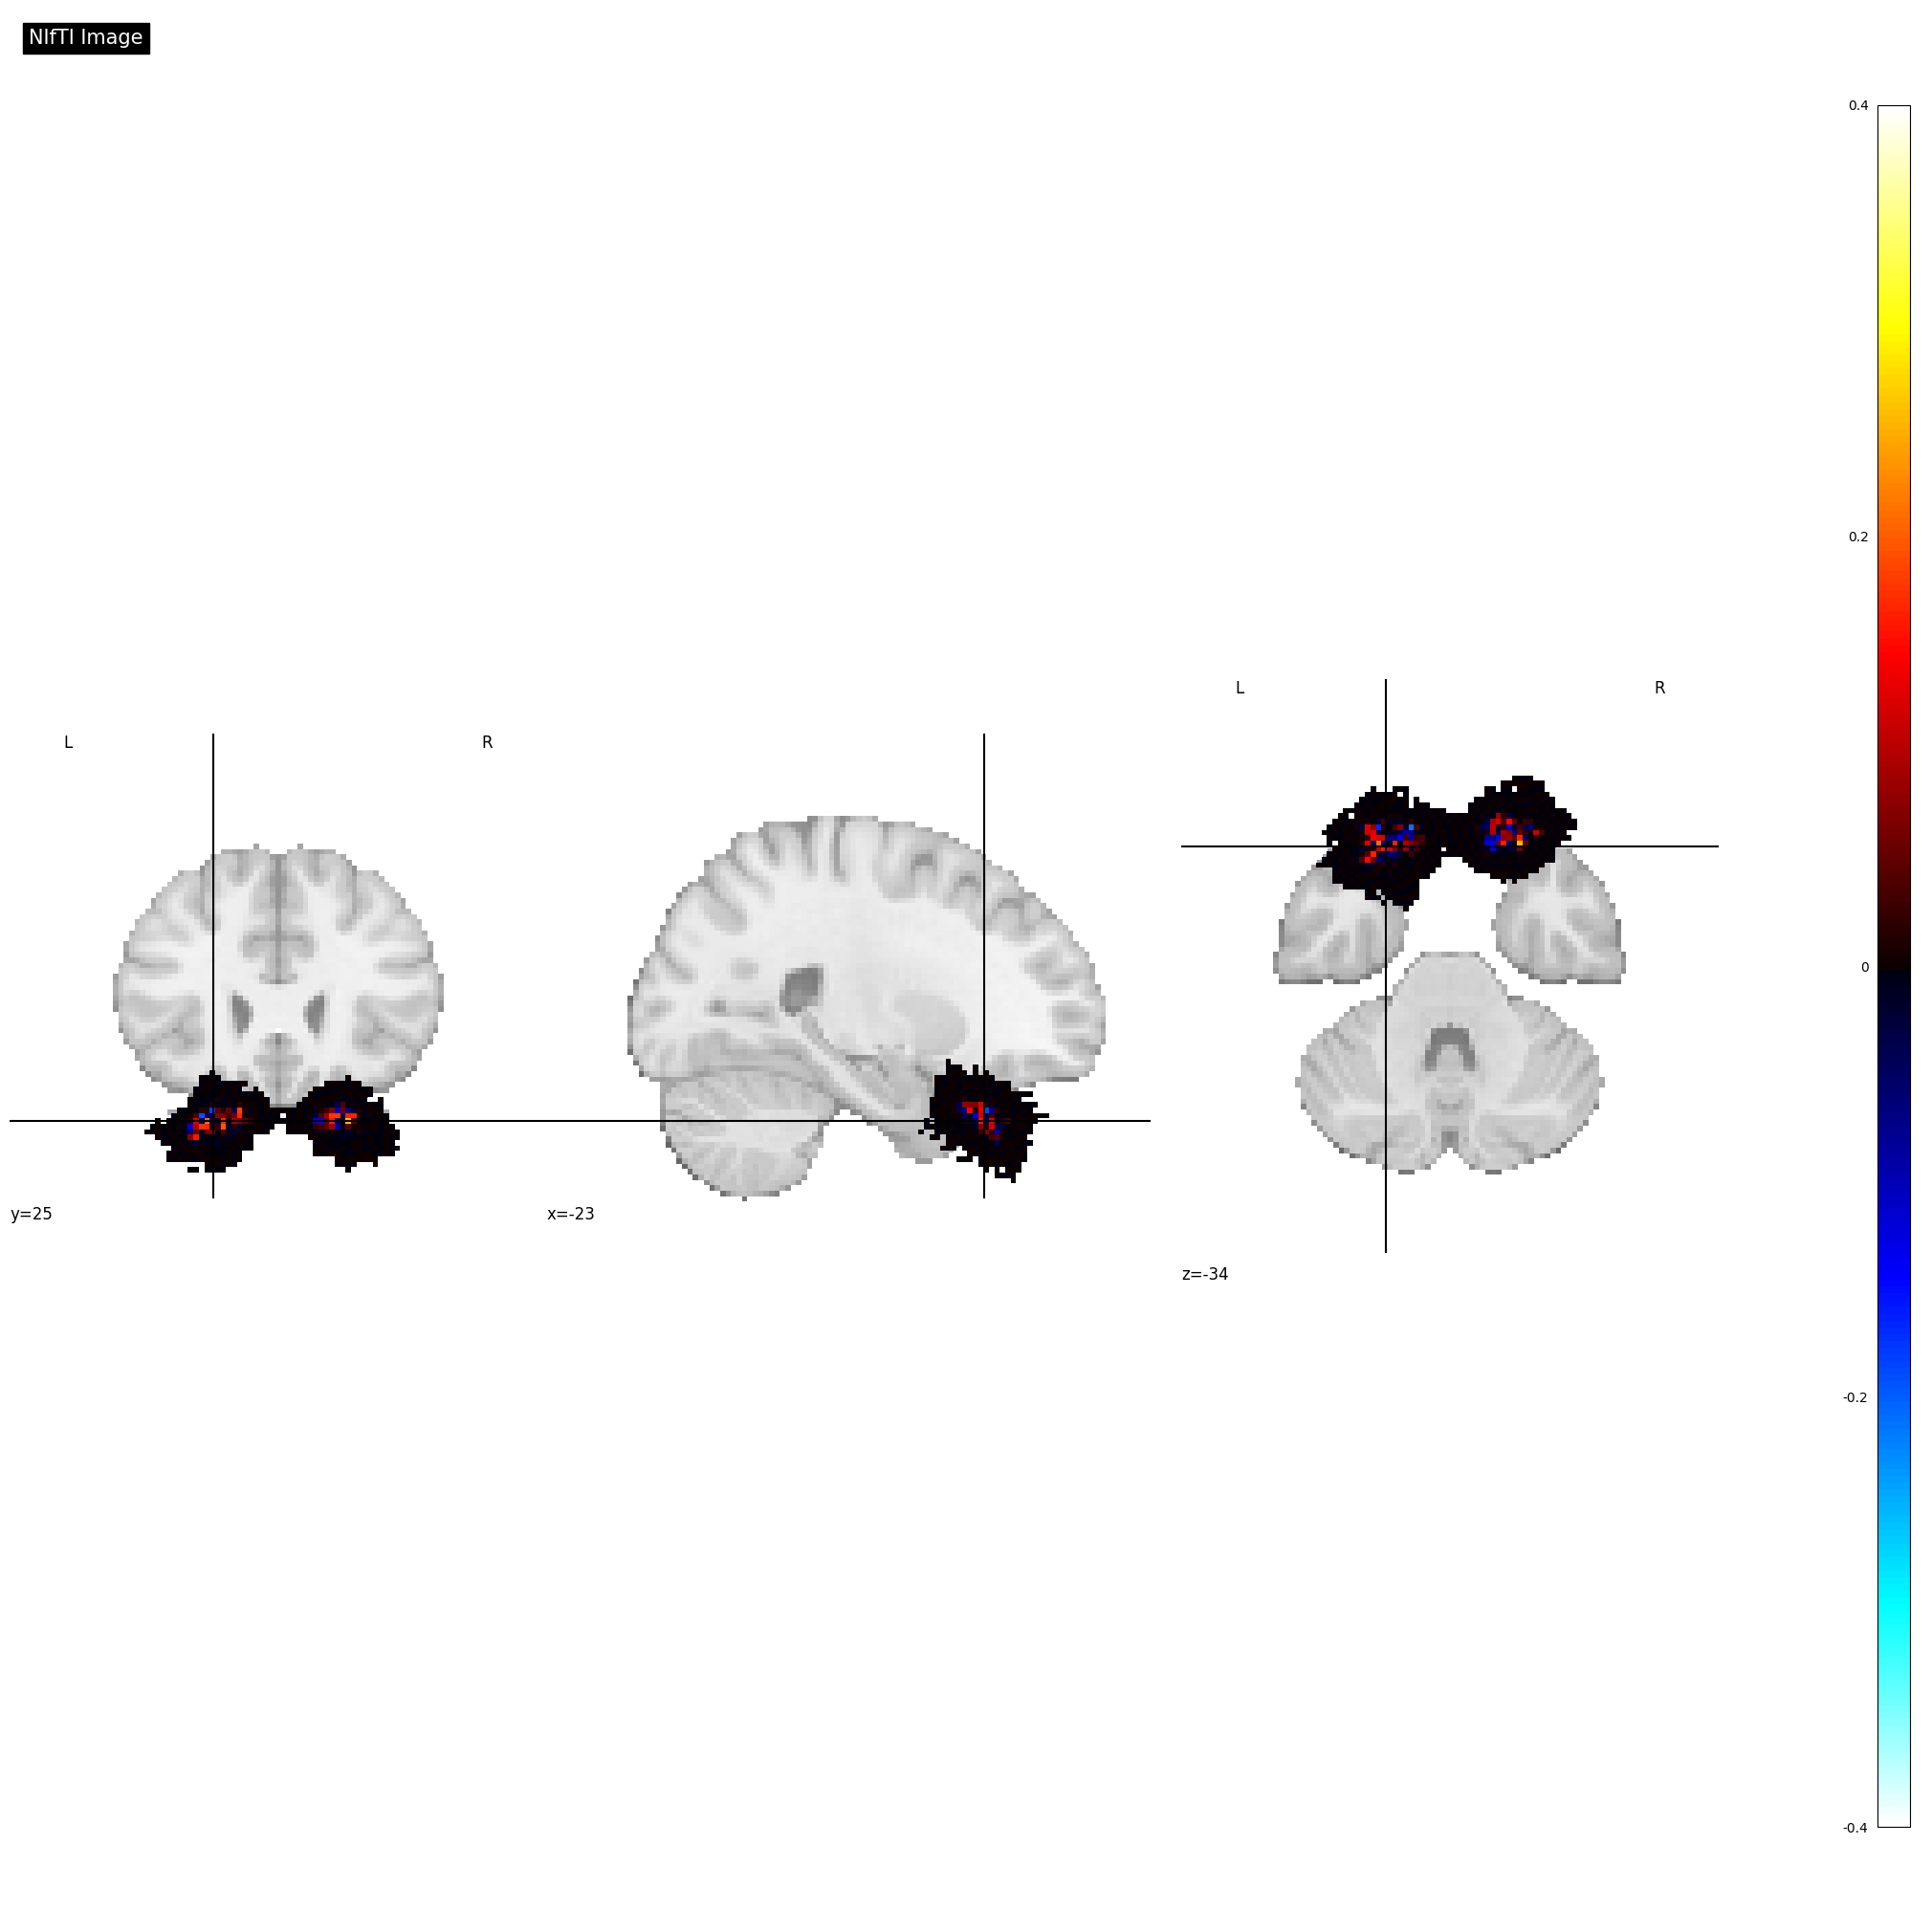

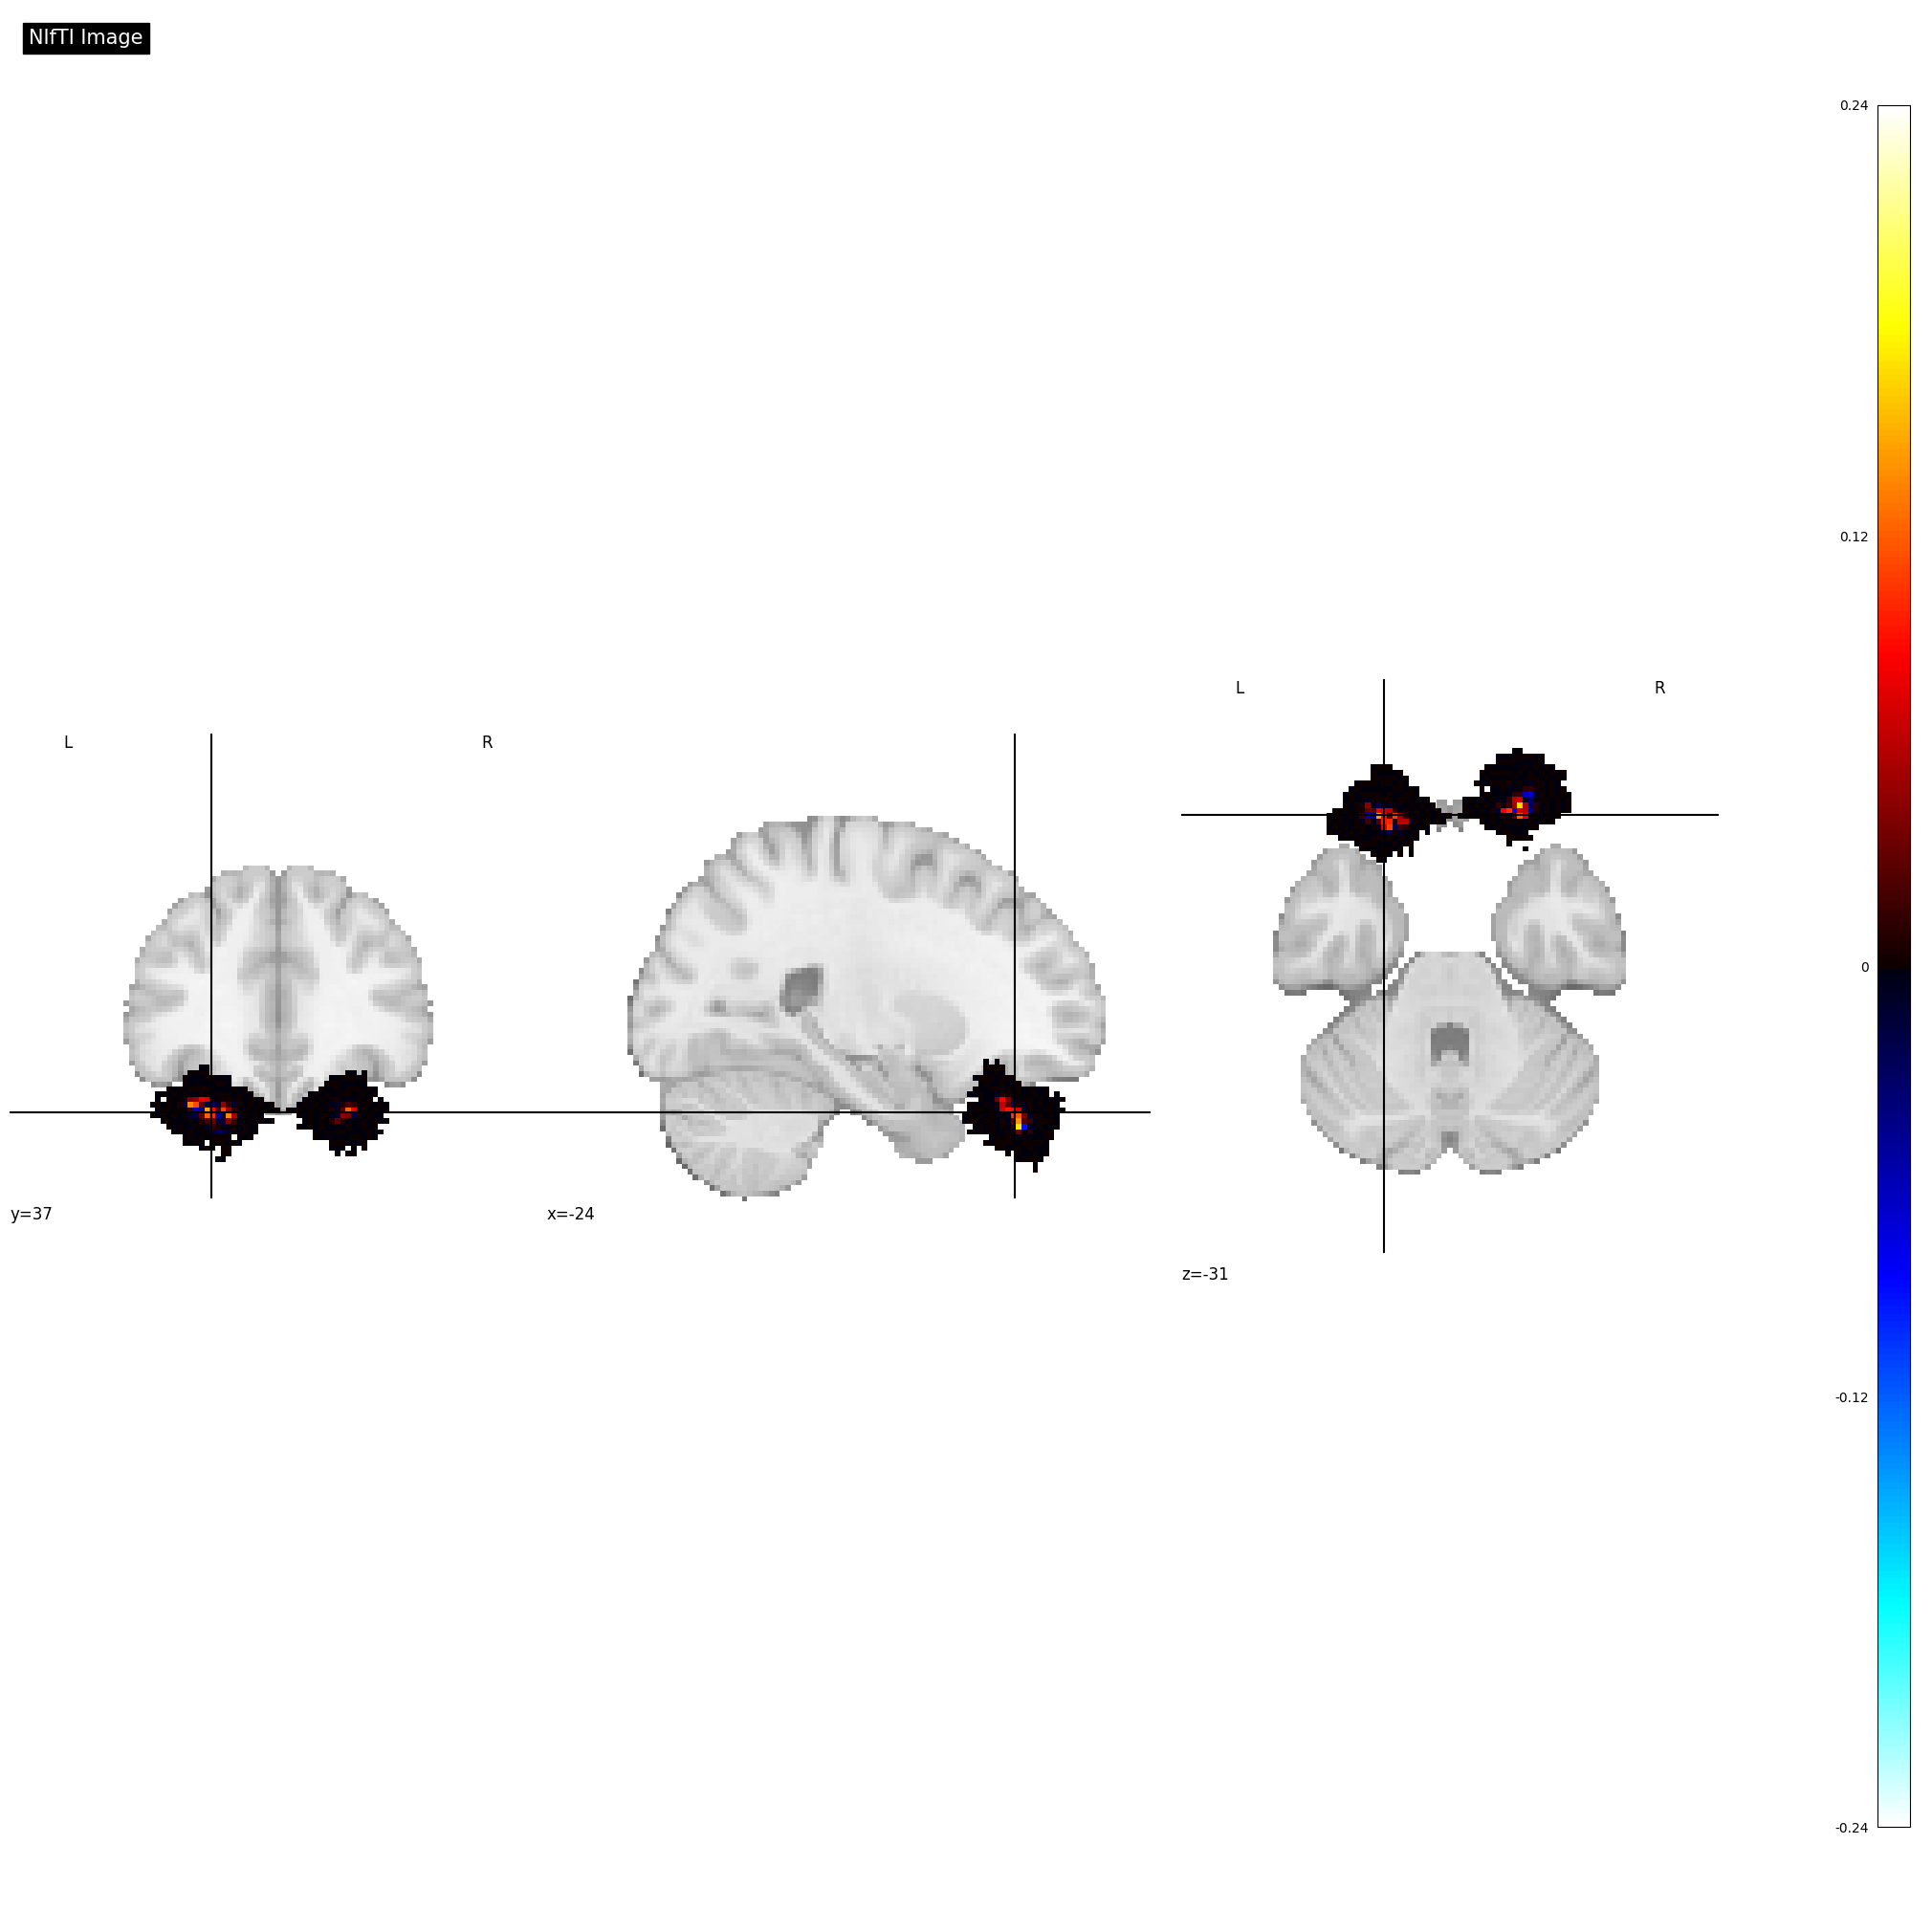

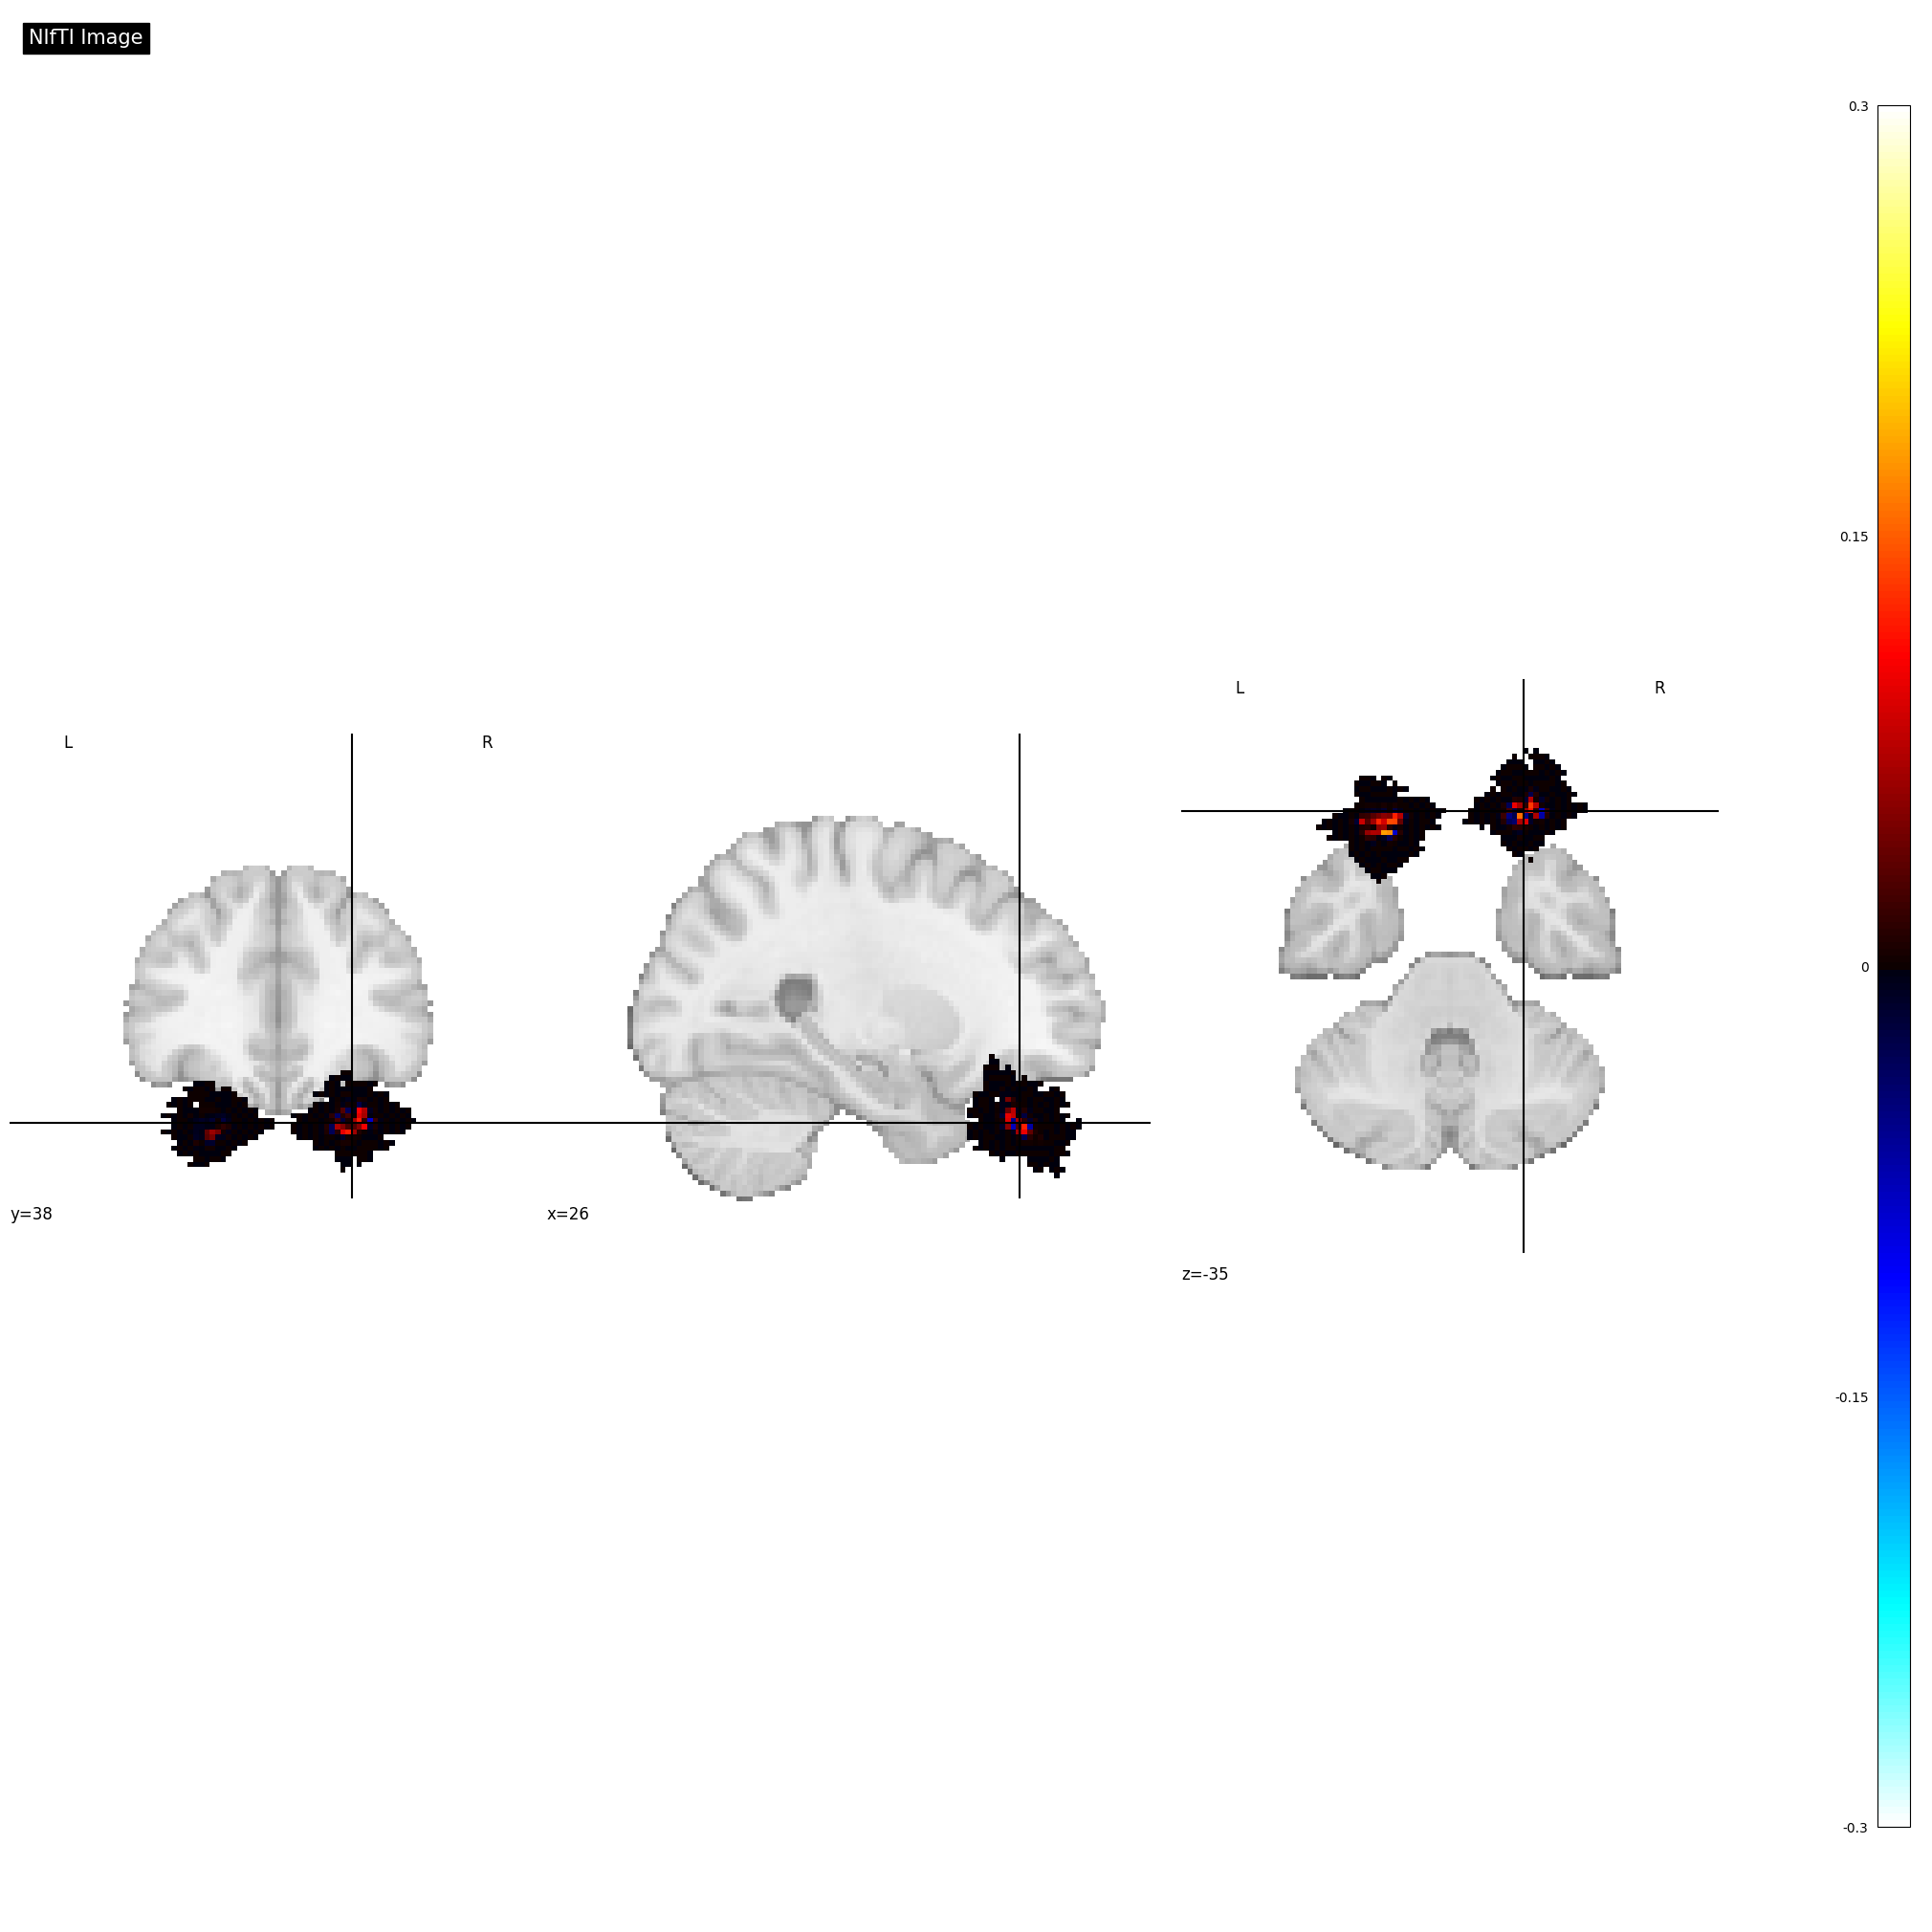

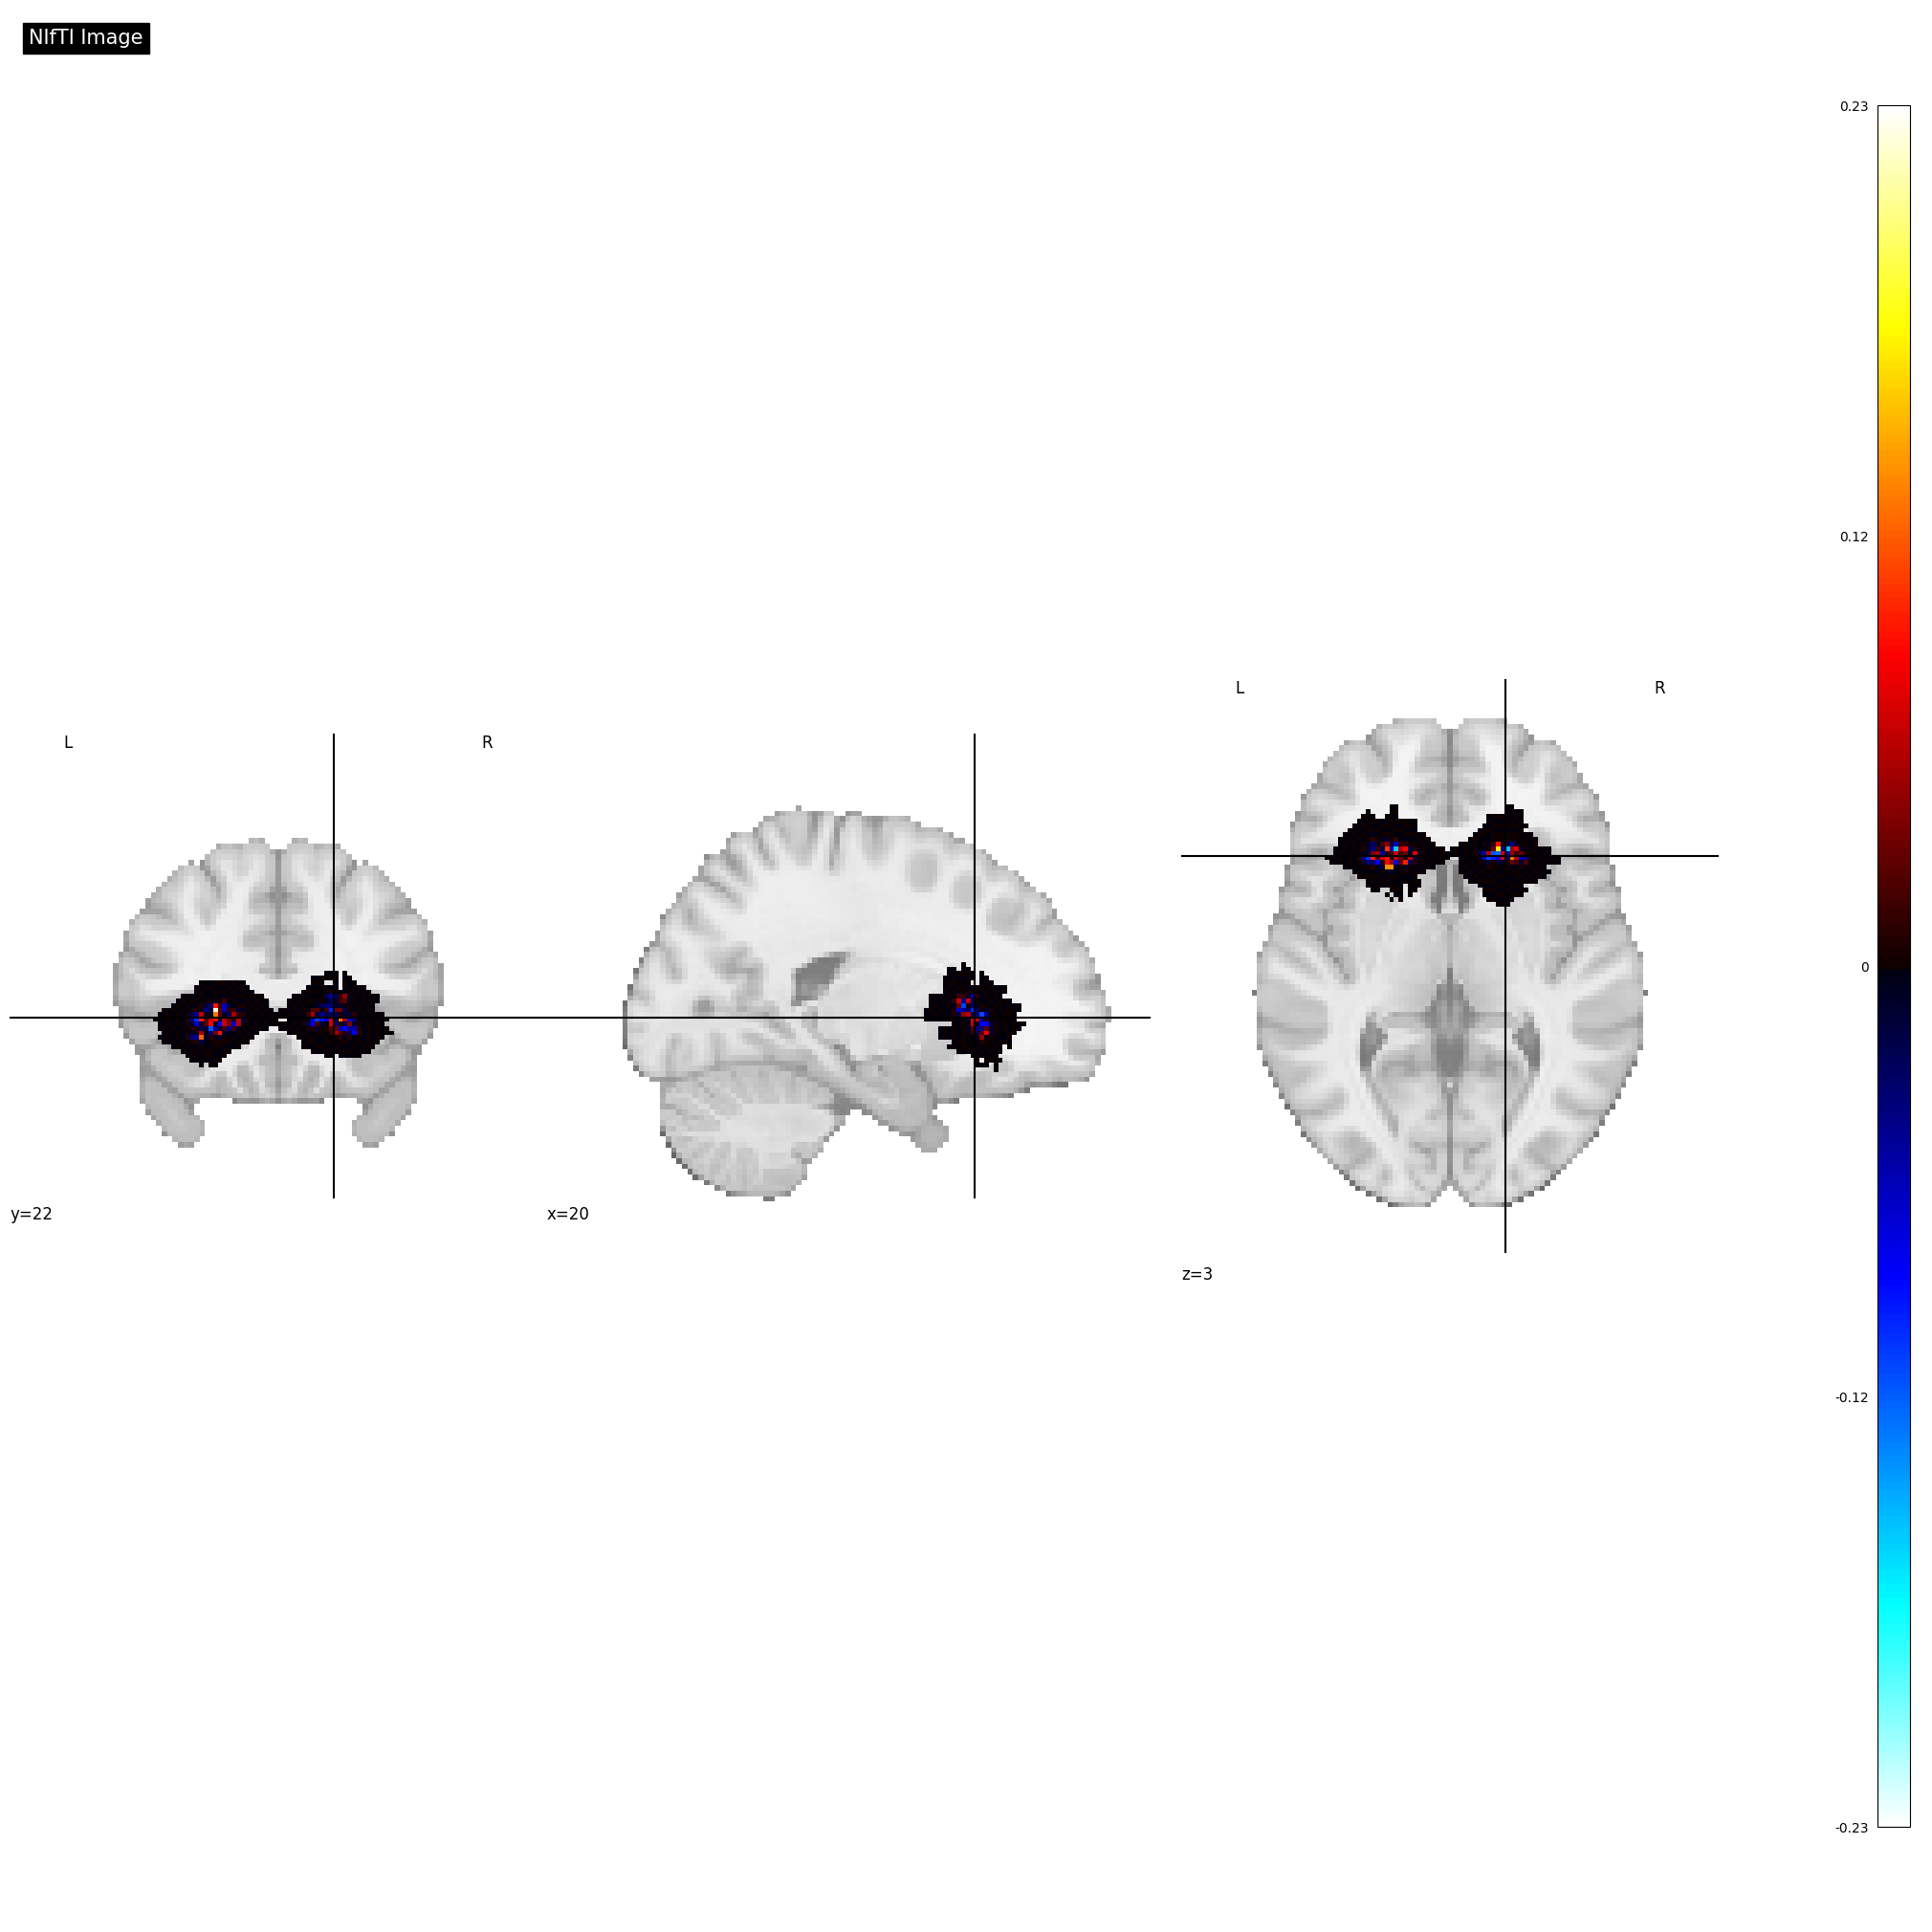

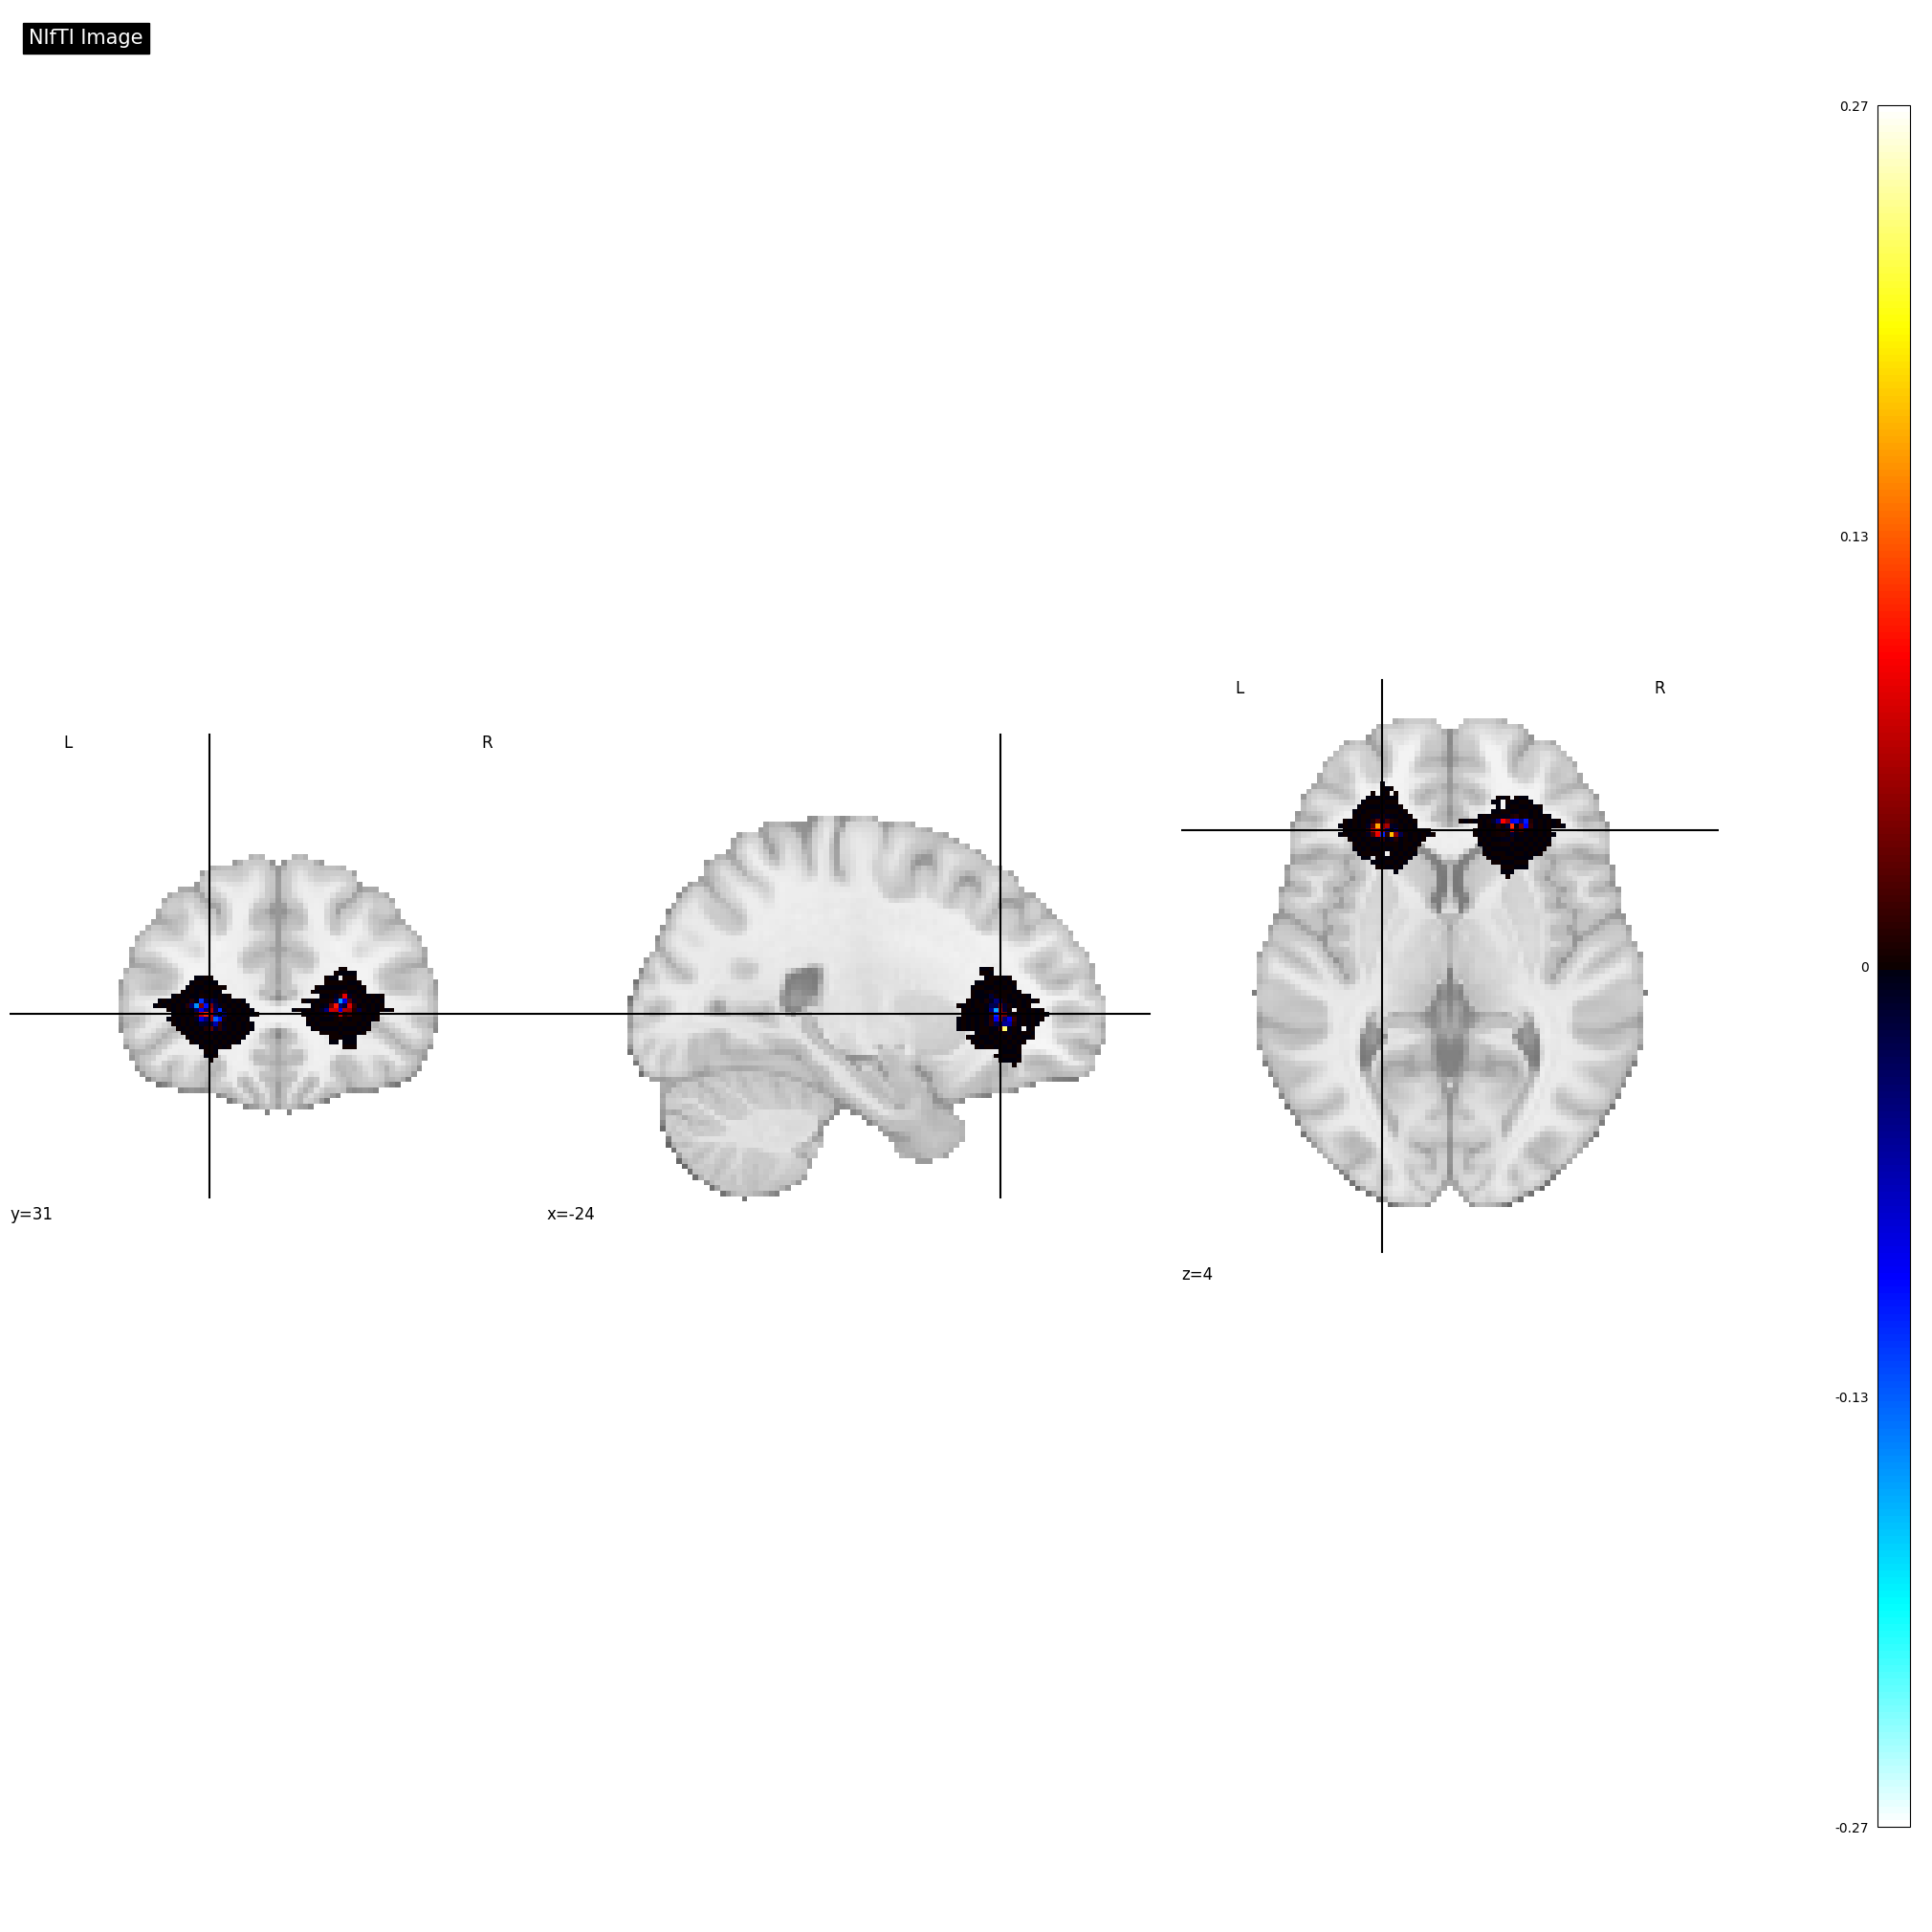

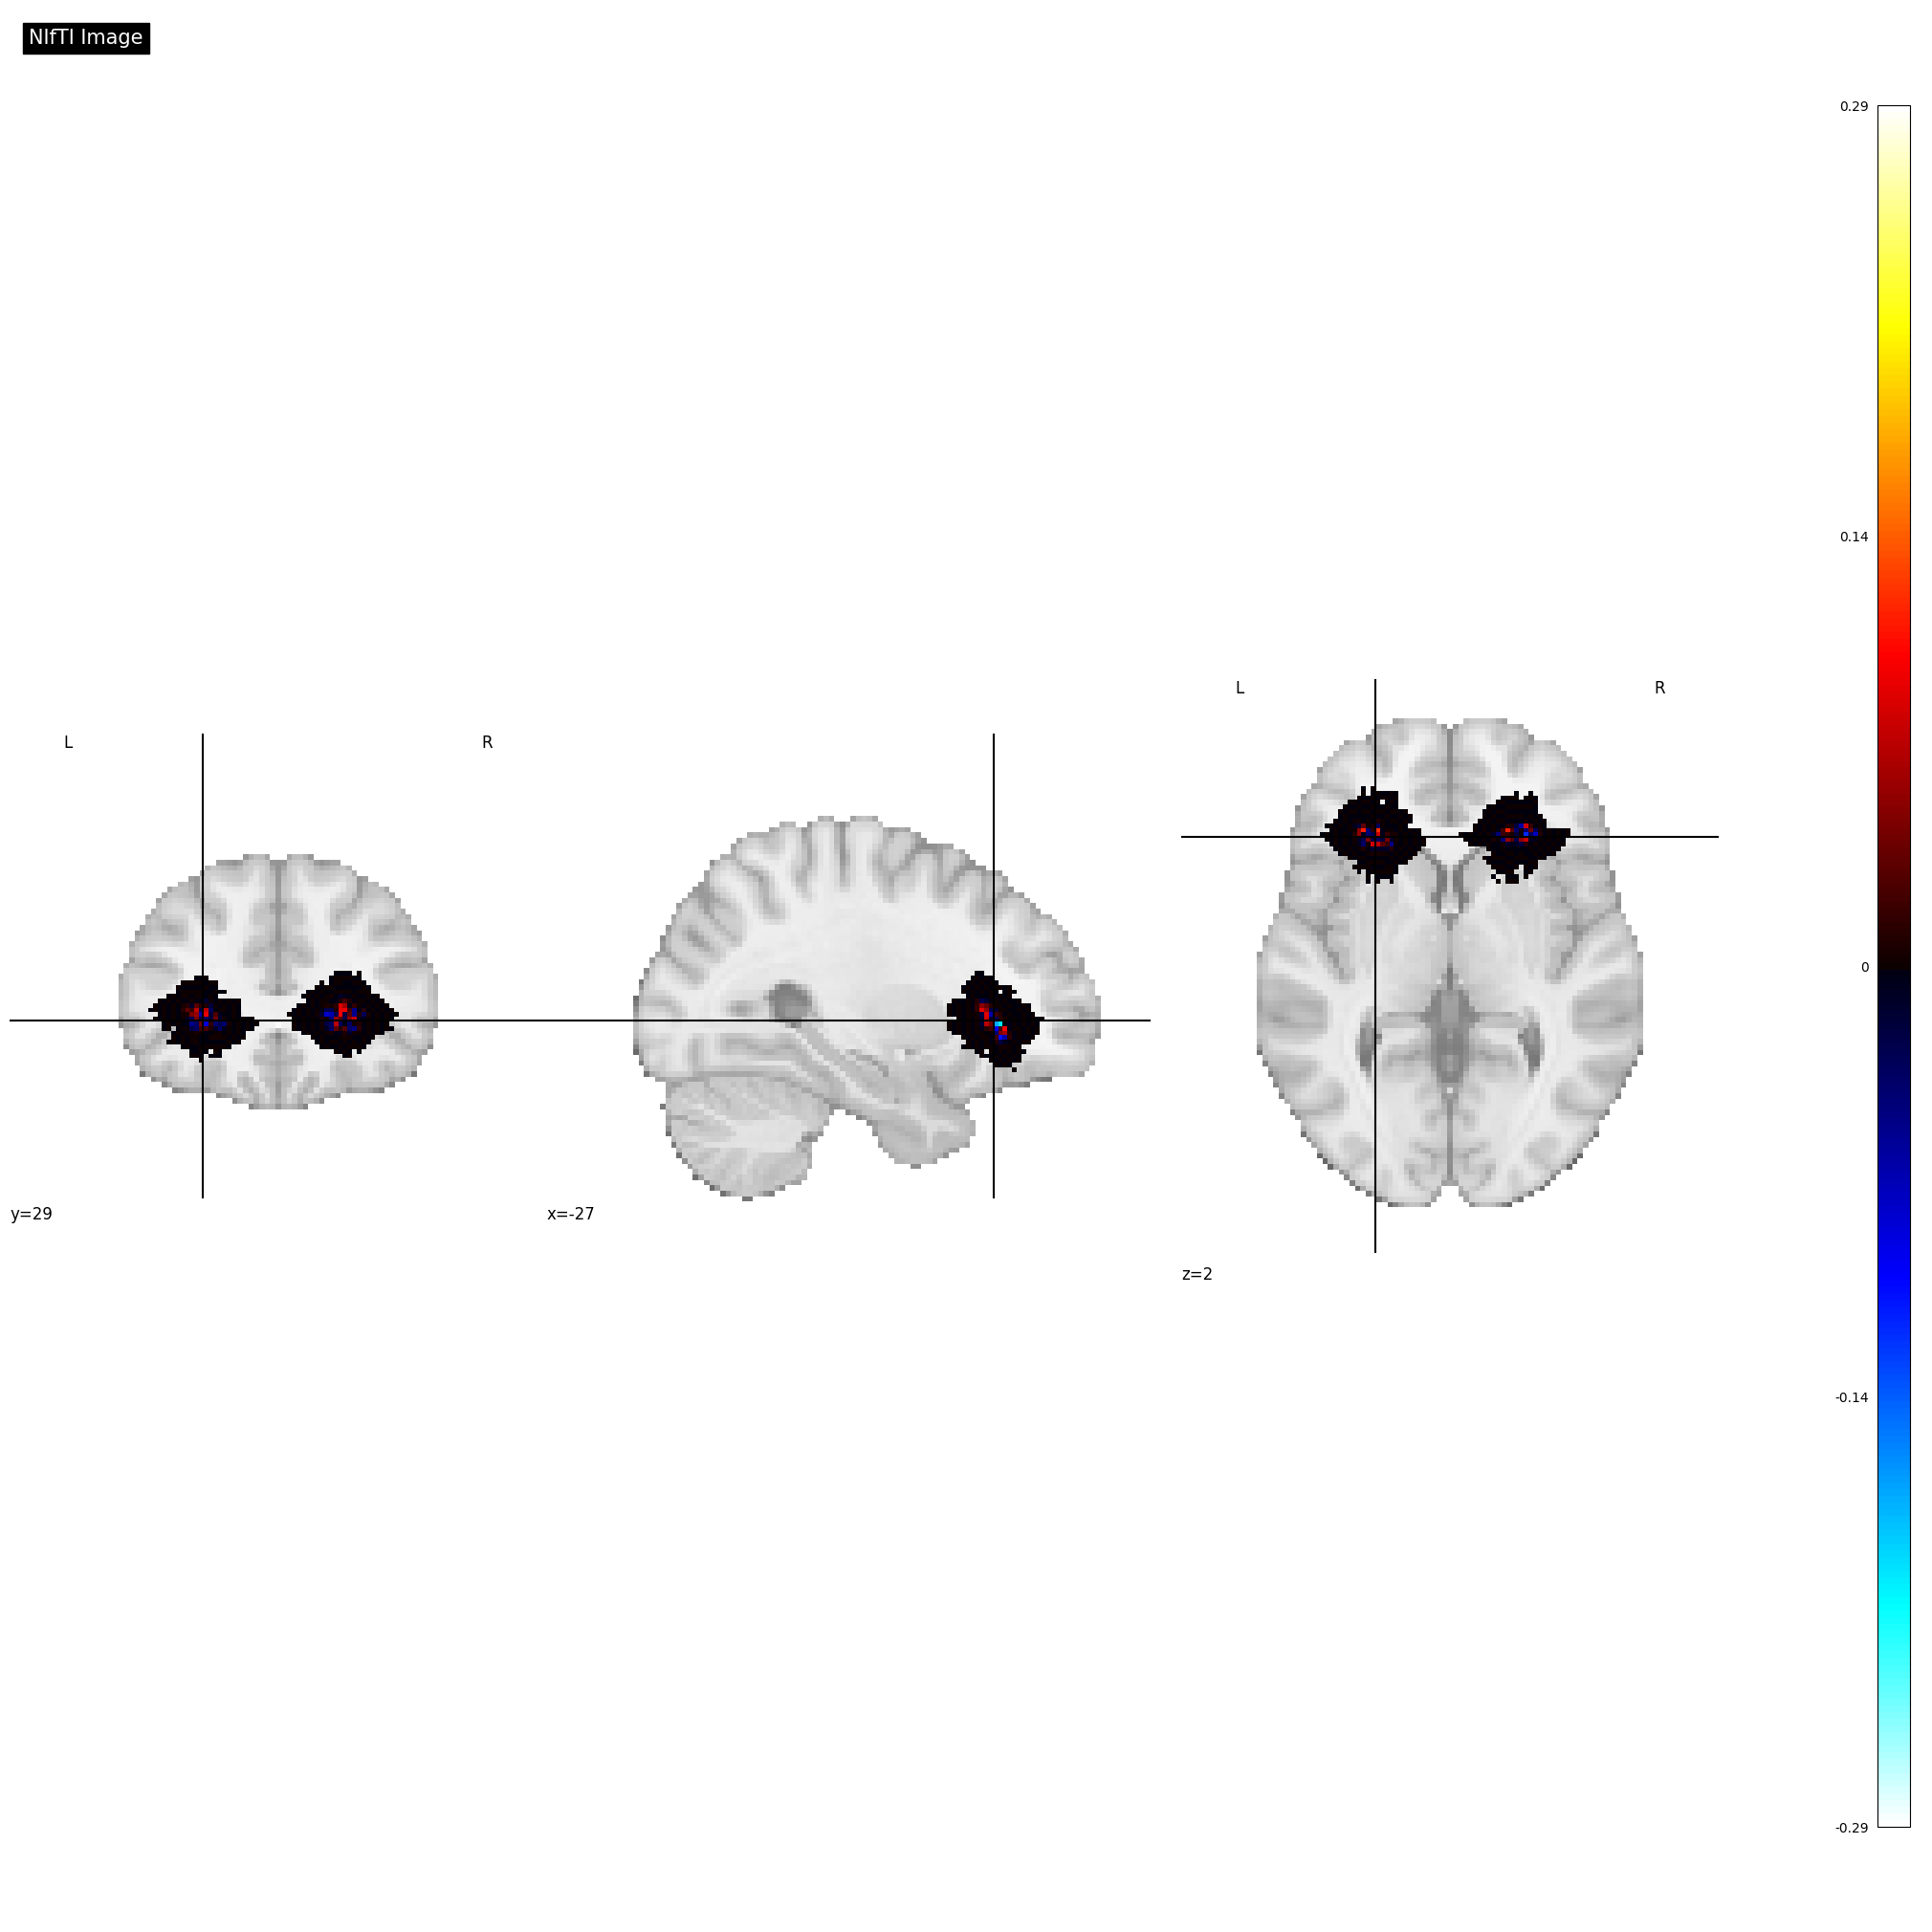

In [28]:
for s in ["S1", "S3"]:
    for roi in ["Amygdala","APC","PPC"]:
        img = nib.load(path_response+f'df_fmri_sagar_metrics_{roi}_{s}_molformer.nii')
        
        # Visualize the image
        display = plotting.plot_stat_map(img, title='NIfTI Image',figure=plt.figure(figsize=(20, 20)))
        # plotting.show()
        display.savefig(path_response+f'df_fmri_sagar_metrics_{roi}_{s}_molformer.png')